In [409]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import mmread
import seaborn as sns
from sklearn.linear_model import LinearRegression
import pandas as pd
import powerlaw as po

# P11.1 Implement simulation of SIS model on ER graph. Compare results with our analytical ﬁndings.

In [410]:
N=100

p=0.05

beta=0.5

gamma=0.2

steps=20

trials=10

In [411]:
survival = lambda x: 1 - (1-beta) ** x

In [412]:
n_infected_list=list()

In [413]:

for trial in range(trials):
    G=nx.generators.random_graphs.erdos_renyi_graph(N,p)

    for i in range(len(G.nodes)):
        G.nodes[i]["sick"]=False

    G.nodes[1]["sick"]=True

    infected=np.array([G.nodes[i]["sick"] for i in G.nodes()])

    #nx.draw(G, node_color=infected)

    A = nx.adjacency_matrix(G)

    n_infected=np.zeros(steps)

    for step in range(steps):
        #infect
        infected=np.random.rand(N)<survival(A *infected)
        n_infected[step]=np.sum(infected)
        #cure
        infected=infected*np.random.rand(N)>gamma

        if np.any(infected)==False:
            break

    n_infected_list.append(n_infected)

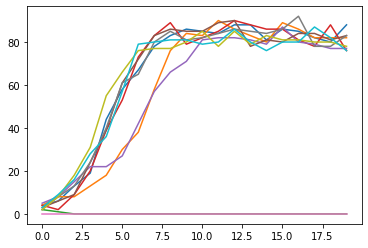

In [414]:
for trial in range(trials):
    sns.lineplot(x=np.arange(steps),y=n_infected_list[trial])

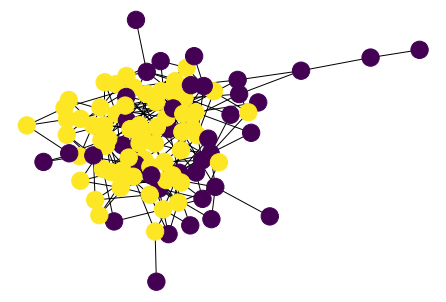

In [415]:
nx.draw(G, node_color=infected)

In [420]:
1-gamma/(beta*nx.density(G)*N)

0.9175

In [417]:
gamma/(beta*nx.density(G)*N)

0.0825

In [418]:
(beta*nx.density(G)*N)/gamma

12.121212121212121

In [419]:
nx.density(G)*N

4.848484848484849

In [407]:
beta

0.5

In [397]:
beta/gamma

1.4999999999999998

# P11.2 Implement simulation of SIS model on BA networks. Compare results with our analytical ﬁndings.

In [421]:
N=100

m=4

beta=0.5

gamma=0.2

steps=20

In [422]:
survival = lambda x: 1 - (1-beta) ** x

In [423]:
n_infected_list=list()

for trial in range(trials):
    G=nx.generators.random_graphs.barabasi_albert_graph(N,m)

    for i in range(len(G.nodes)):
        G.nodes[i]["sick"]=False

    G.nodes[1]["sick"]=True

    infected=np.array([G.nodes[i]["sick"] for i in G.nodes()])

    #nx.draw(G, node_color=infected)

    A = nx.adjacency_matrix(G)

    n_infected=np.zeros(steps)

    for step in range(steps):
        #infect
        infected=np.random.rand(N)<survival(A *infected)
        n_infected[step]=np.sum(infected)
        #cure
        infected=infected*np.random.rand(N)>gamma

        if np.any(infected)==False:
            break

    n_infected_list.append(n_infected)

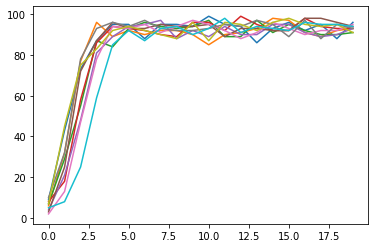

In [424]:
for trial in range(trials):
    sns.lineplot(x=np.arange(steps),y=n_infected_list[trial])

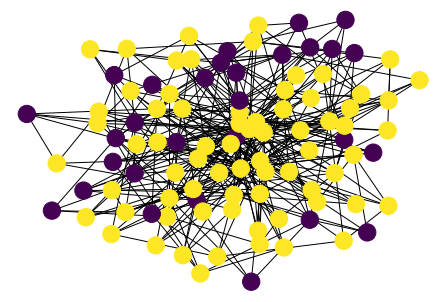

In [425]:
nx.draw(G, node_color=infected)

In [426]:
1-gamma/(beta*nx.density(G)*N)

0.9484375

In [427]:
nx.density(G)*N/(nx.density(G)*(1-nx.density(G))*N+(nx.density(G)*N)**2)

0.11520737327188939

In [428]:
beta/gamma

2.5

# P11.3 Implement simulation of different than SIS agent-based model. Discuss obtained results.

In [429]:
N=100

p=0.1

beta=0.5

gamma=0.2

steps=20

trials=10

In [430]:
survival = lambda x: 1 - (1-beta) ** x

In [431]:
n_infected_list=list()

for trial in range(trials):
    G=nx.generators.random_graphs.erdos_renyi_graph(N,p)

    for i in range(len(G.nodes)):
        G.nodes[i]["sick"]=False

    G.nodes[1]["sick"]=True

    infected=np.array([G.nodes[i]["sick"] for i in G.nodes()])

    A = nx.adjacency_matrix(G)

    n_infected=np.zeros(steps)

    infected_quarantine=np.ones(N,dtype=bool)

    for step in range(steps):
        #infect
        infected_old=infected
        infected=np.random.rand(N)<survival(A * (infected * infected_quarantine))
        n_infected[step]=np.sum(infected)
        #cure
        infected=infected*np.random.rand(N)>gamma
        #quarantine
        infected_quarantine=np.invert(infected_old)

        if np.any(infected)==False:
            break
    
    n_infected_list.append(n_infected)

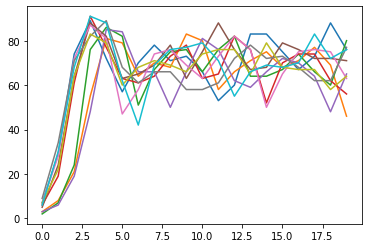

In [432]:
for trial in range(trials):
    sns.lineplot(x=np.arange(steps),y=n_infected_list[trial])

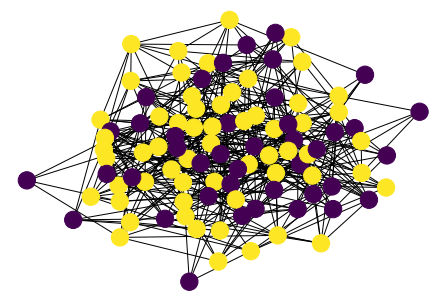

In [433]:
nx.draw(G, node_color=infected)

In [434]:
1-gamma/(beta*nx.density(G)*N)

0.9589211618257262

In [435]:
beta/gamma

2.5